In [3]:
# Import necessary packages
import os
import pandas as pd
from pprint import pprint

import nfl_data_py as nfl

# set options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

Reading in Team Rosters

In [51]:
filename = os.listdir('data/')[0]
df = pd.read_excel(f'data/{filename}')

# Rename columns    
c = {
    'Team Name | Your Name': 'Manager',
    'Group 1 Quarterbacks': 'qb1',
    'Group 2 Quarterbacks': 'qb2',
    'Group 3 Quarterbacks': 'qb3',
    'Group 1 Running Backs': 'rb1',
    'Group 2 Running Backs': 'rb2', 
    'Group 3 Running Backs': 'rb3',
    'Group 4 Running Backs': 'rb4', 
    'Group 1 Wide Receivers': 'wr1',
    'Group 2 Wide Receivers': 'wr2', 
    'Group 3 Wide Receivers': 'wr3',
    'Group 4 Wide Receivers': 'wr4', 
    'Group 5 Wide Receivers': 'wr5', 
    'Tier 1 Tight Ends': 'te1',
    'Tier 2 Tight Ends': 'te2', 
    'Timestamp': 'timestamp'
}
df = df.rename(columns=c)
df.drop(columns=['timestamp'], inplace=True)

# Find all commas and replace with |
df = df.replace(',', ' | ', regex=True)

# Reorient the dataframe to be in a long format
df = df.melt(id_vars=['Manager'], value_name='Player')
df.rename(columns={'variable': 'Position'}, inplace=True)

# Split player names and team names
df[['Player', 'Team']] = df['Player'].str.split('|', expand=True)

#remove extra spaces
df['Player'] = df['Player'].str.strip()
df['Team'] = df['Team'].str.strip()

df.head()

,Manager,Position,Player,Team
0,2-10 Hahaha,qb1,Josh Allen,Buffalo Bills
1,A G-Thang,qb1,Josh Allen,Buffalo Bills
2,Abarrett35,qb1,Josh Allen,Buffalo Bills
3,Alexander’s Raiders,qb1,Josh Allen,Buffalo Bills
4,Ball Too Well (Allie’s Version),qb1,Lamar Jackson,Baltimore Ravens


In [26]:
# Fixing typos in player names and unifying spelling
typos = {"Deebo Samual":"Deebo Samuel", "Jermone Ford":"Jerome Ford", "Edwards-Helaire":"Clyde Edwards-Helaire",
        "Clyde Edwards Helaire":"Clyde Edwards-Helaire", "Patrick Toney":"Kadarius Toney", "AJ Brown":"A.J. Brown",
        "Deandre Swift":"D'Andre Swift", "Davonte Smith":"DeVonta Smith", "Devonte Smith":"DeVonta Smith"}

df['Player'] = df.Player.replace(typos)

df.sort_values(['Team', 'Player'])

,Manager,Player,Team
143,Spencer,Brock Purdy,49Ers
195,Erin,Brock Purdy,49Ers
3,Adam,Christian McCaffrey,49Ers
68,Greg,Christian McCaffrey,49Ers
81,JoeP,Christian McCaffrey,49Ers
...,...,...,...
24,Antoin,Dalton Schultz,Texans
96,Johan,Dameon Pierce,Texans
278,Mike,Dameon Pierce,Texans
163,Allie,Nico Collins,Texans


In [55]:
## Adding the 4 weeks of Playoffs and Filtering to only teams playing 
wc_teams = ['Detroit Lions', 'Kansas City Chiefs']
df['Wildcard'] = df.Team.apply(lambda t: False if t in wc_teams else True)

# Divisional 
div_teams = ['Detroit Lions', 'Kansas City Chiefs', 'Houston Texans', 'Baltimore Ravens']
df['Division'] = df.Team.isin(div_teams)

# Conference
conf_teams = []
df['Conference'] = df.Team.isin(conf_teams)

# Super Bowl
sb_teams = []
df['Super Bowl'] = df.Team.isin(sb_teams)

df.sample(5)

,Manager,Position,Player,Team,Wildcard,Division,Conference,Super Bowl
109,Turd Ferguson,qb3,Jordan Love,Green Bay Packers,True,False,False,False
191,Born tua be wild,rb3,Brian Robinson,Washington Commanders,True,False,False,False
232,F.O.G.| Joe Pino,rb4,Dameon Pierce,Houston Texans,True,True,False,False
24,New Year | Same Me | Wesley,qb1,Lamar Jackson,Baltimore Ravens,True,True,False,False
516,Turd Ferguson,te2,Mark Andrews,Baltimore Ravens,True,True,False,False


In [56]:
# Change Team to compatible code for pbp

teams_dict = {'Buffalo Bills': 'BUF', 
              'Baltimore Ravens': 'BAL',
              'Philadelphia Eagles': 'PHI',
              'Tampa Bay Buccaneers': 'TB', 
              'Kansas City Chiefs': 'KC', 
              'Detroit Lions': 'DET',
              'Minnesota Vikings': 'MIN', 
              'Los Angeles Rams': 'LAR', 
              'Houston Texans': 'HOU',
              'Denver Broncos': 'DEN', 
              'Green Bay Packers': 'GB', 
              'Pittsburgh Steelers': 'PIT',
              'Los Angeles Chargers': 'LAC', 
              'Washington Commanders': 'WAS'}

df['Team'] = df.Team.map(lambda t: teams_dict[t])
df.to_csv("data/managers_games.csv")
df.head(5)

,Manager,Position,Player,Team,Wildcard,Division,Conference,Super Bowl
0,2-10 Hahaha,qb1,Josh Allen,BUF,True,False,False,False
1,A G-Thang,qb1,Josh Allen,BUF,True,False,False,False
2,Abarrett35,qb1,Josh Allen,BUF,True,False,False,False
3,Alexander’s Raiders,qb1,Josh Allen,BUF,True,False,False,False
4,Ball Too Well (Allie’s Version),qb1,Lamar Jackson,BAL,True,True,False,False


In [57]:
def fix_name(name):
    n = name.split(" ")
    if n == name:
        return name
    else:
        first = n[0][0]
        last = n[-1]
        return  first + '.' + last

df['Name'] = df.Player.apply(lambda p: fix_name(p))

In [58]:
# Update Amon-Ra St. Brown's player name in PBP
df.loc[df.Player=="Amon-Ra St. Brown", 'Name'] = "A.St. Brown"

sorted(df.Name.unique())

['A.Brown',
 'A.Cooper',
 'A.Jones',
 'A.St. Brown',
 'B.Corum',
 'B.Irving',
 'B.Mayfield',
 'B.Nix',
 'B.Robinson',
 'C.Kupp',
 'C.Otton',
 'C.Reynolds',
 'C.Stroud',
 'C.Sutton',
 'D.Goedert',
 'D.Henry',
 'D.Hopkins',
 'D.Johnson',
 'D.Jr.',
 'D.Kincaid',
 'D.Pierce',
 'D.Robinson',
 'D.Schultz',
 'D.Smith',
 'D.Vele',
 'D.Wicks',
 'E.Wilson',
 'I.Likely',
 'I.Pacheco',
 'J.Addison',
 'J.Allen',
 'J.Cook',
 'J.Dobbins',
 'J.Dotson',
 'J.Gibbs',
 'J.Goff',
 'J.Hurts',
 'J.III',
 'J.Jacobs',
 'J.Jefferson',
 'J.Love',
 'J.McLaughlin',
 'J.McMillan',
 'J.McNichols',
 'J.Mixon',
 'J.Nailor',
 'J.Warren',
 'J.Williams',
 'K.Coleman',
 'K.Gainwell',
 'K.Hunt',
 'K.Shakir',
 'K.Williams',
 'L.Jackson',
 'L.McConkey',
 'M.Andrews',
 'M.Evans',
 'M.Heath',
 'M.Hollins',
 'M.Mims',
 'M.Stafford',
 'N.Collins',
 'N.Harris',
 'O.Zaccheaus',
 'P.Freiermuth',
 'P.Mahomes',
 'P.Nacua',
 'Q.Johnston',
 'R.Bateman',
 'R.Davis',
 'R.Dobbs',
 'R.White',
 'R.Wilson',
 'S.Barkley',
 'S.Darnold',
 'S.La

---   

Adding in Post-Season Scoring
 
[field descriptions](https://www.nflfastr.com/articles/field_descriptions.html)

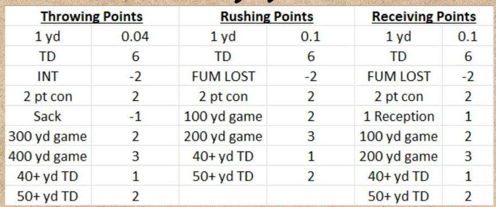

Passing Points

In [89]:
import json
test_df = ("https://site.api.espn.com/apis/site/v2/sports/football/nfl/scoreboard")
test_df

AttributeError: module 'json' has no attribute 'read'

In [127]:
# Define passing points function

def passing_points(w, name, qb_print=False):
    pass_yards = pbp_pass.query("week==@w & passer==@name")['passing_yards'].sum()
    pass_td = pbp_pass.query("week==@w & passer==@name & series_result=='Touchdown' & td_team.notnull()")['series_success'].count()
    int_ = pbp_pass.query("week==@w & passer==@name & interception==1")['series_success'].count()
    two_pt = pbp_pass.query("week==@w & passer==@name & two_point_attempt==1 & two_point_conv_result=='success'")['series_success'].count() 
    sack = pbp_pass.query("week==@w & passer==@name & sack==1")['series_success'].count() 
    td40yd = sum(pbp_pass.query("week==@w & passer==@name & series_result=='Touchdown' & td_team.notnull()")['passing_yards'] >= 40)
    td50yd = sum(pbp_pass.query("week==@w & passer==@name & series_result=='Touchdown' & td_team.notnull()")['passing_yards'] >= 50)
    if pass_yards > 400:
        bonus = 3
    elif pass_yards > 300:
        bonus = 2
    else:
        bonus=0
    total = (.04*pass_yards) + (6*pass_td) + (-2*int_) + (2*two_pt) + (-1*sack) + (2*td50yd) + td40yd + bonus
    if qb_print == True:
        print(f"Passing Yards: {pass_yards} \nPassing TDs: {pass_td} \nInterceptions: {int_} \nTwo Point Conversions: {two_pt}\
              \nSacks: {sack} \n40+ Yard TDs: {td40yd} \n50+ Yard TDs: {td50yd} \nBonus: {bonus} \nTotal: {total}")
    
    return total

In [138]:
# Apply passing points to games played

df['Passing_wc'] = df.Name.apply(lambda x: passing_points(19, x))
df['Passing_div'] = df.Name.apply(lambda x: passing_points(20, x))
df['Passing_conf'] = df.Name.apply(lambda x: passing_points(21, x))
df['Passing_sb'] = df.Name.apply(lambda x: passing_points(22, x))  # this may be 22

pass_cols = [c for c in df.columns if "Passing" in c]
df['Total_passing'] = df[pass_cols].sum(axis=1)

# df.sort_values('Total_passing', ascending=False).sample(3)

,Manager,Player,Team,Wildcard,Division,Conference,Super Bowl,Name,Passing_wc,Passing_div,Passing_conf,Passing_sb,Total_passing,Receiving_wc,Receiving_div,Receiving_conf,Receiving_sb,Total_receiving,Rushing_wc,Rushing_div,Rushing_conf,Rushing_sb,Total_rushing,Total_WC,Total_Div,Total_Conf,Total_SB,Total
98,Johan,DeVonta Smith,PHI,True,False,False,False,D.Smith,0.00,0.00,0.00,0.0,0.00,24.8,0.0,0.0,0.0,24.8,0.0,0.0,0.0,0.0,0.0,24.80,0.00,0.00,0.0,24.80
222,Hunter,Jared Goff,DET,True,True,True,False,J.Goff,14.08,21.48,14.92,0.0,50.48,0.0,0.0,0.0,0.0,0.0,0.0,0.3,0.0,0.0,0.3,14.08,21.78,14.92,0.0,50.78
278,Mike,Dameon Pierce,HOU,True,True,False,False,D.Pierce,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00


Receiving Points

In [86]:
# Define Receiving Points function

def receiving_points(w, name, rec_print=False):
    rec_yards = pbp_pass.query("week==@w & receiver==@name")['receiving_yards'].sum()
    rec_td = pbp_pass.query("week==@w & receiver==@name & series_result=='Touchdown' & td_team.notnull()")['series_success'].count()
    fumble = pbp_pass.query("week==@w & receiver==@name")['fumble'].sum()
    two_pt = pbp_pass.query("week==@w & receiver==@name & two_point_conv_result=='success'")['two_point_attempt'].sum()   
    recptn = pbp_pass.query("week==@w & receiver==@name & receiving_yards.notnull()")['receiving_yards'].count()
    td40yd = pbp_pass.query("week==@w & receiver==@name & series_result=='Touchdown' & td_team.notnull() & receiving_yards>=40 & receiving_yards<50")['receiving_yards'].count()
    td50yd = pbp_pass.query("week==@w & receiver==@name & series_result=='Touchdown' & td_team.notnull() & receiving_yards>=50")['receiving_yards'].count()
    if rec_yards > 200:
        bonus = 3
    elif rec_yards > 100:
        bonus = 2
    else:
        bonus=0
    total = (.1*rec_yards) + (6*rec_td) + (-2*fumble) + (2*two_pt) + (2*td50yd) + td40yd + bonus + recptn
    if rec_print == True:
        print(f"Receiving Yards: {rec_yards} \nReceiving TDs: {rec_td} \nFumbles: {fumble} \nTwo Point Conversions: {two_pt}\
              \n40+ Yard TDs: {td40yd} \n50+ Yard TDs: {td50yd} \nBonus: {bonus} \nReceptions: {recptn} \nTotal: {total}")
    
    return total

In [139]:
# Apply receiving points to games played

df['Receiving_wc'] = df.Name.apply(lambda x: receiving_points(19, x))
df['Receiving_div'] = df.Name.apply(lambda x: receiving_points(20, x))
df['Receiving_conf'] = df.Name.apply(lambda x: receiving_points(21, x))
df['Receiving_sb'] = df.Name.apply(lambda x: receiving_points(22, x))  # this may be 22

rec_cols = [c for c in df.columns if "Receiving" in c]
df['Total_receiving'] = df[rec_cols].sum(axis=1)

# df.sort_values('Total_receiving', ascending=False).sample(3)

Rushing Points

In [56]:
# Rushing points - subset pbp to only rushing plays

pbp_run  = pbp_playoff[pbp_playoff.play_type == 'run'].dropna(axis=1, how='all').reset_index(drop=True)
# pbp_run.info()

In [135]:

def rushing_yards(w, name, rush_print=False):
    if name == 'A.St. Brown':
        name = ['A.St. Brown', 'St. Brown']
        rush_yards = pbp_run.query("week==@w & rusher in @name")['rushing_yards'].sum()
        lat_yards = pbp_run.query("week==@w & lateral_rusher_player_name==@name & lateral_rush==1")['lateral_rushing_yards'].sum()
        qb_run_yards = pbp_run.query("week==@w & passer==@name")['yards_gained'].sum()  
        total_yards = rush_yards + lat_yards + qb_run_yards
        rush_td = pbp_run.query("week==@w & rusher in @name & series_result=='Touchdown' & td_team.notnull()")['series_success'].count()
        fumble = pbp_run.query("week==@w & rusher in @name")['fumble'].sum()
        two_pt = pbp_run.query("week==@w & rusher in @name & two_point_conv_result=='success'")['two_point_attempt'].sum()   
        td40yd = pbp_run.query("week==@w & rusher in @name & series_result=='Touchdown' & td_team.notnull() & rushing_yards>=40 & rushing_yards<50")['rushing_yards'].count()
        td50yd = pbp_run.query("week==@w & rusher in @name & series_result=='Touchdown' & td_team.notnull() & rushing_yards>=50")['rushing_yards'].count()
    rush_yards = pbp_run.query("week==@w & rusher==@name")['rushing_yards'].sum()
    lat_yards = pbp_run.query("week==@w & lateral_rusher_player_name==@name & lateral_rush==1")['lateral_rushing_yards'].sum()
    qb_run_yards = pbp_run.query("week==@w & passer==@name")['yards_gained'].sum()  
    total_yards = rush_yards + lat_yards + qb_run_yards
    rush_td = pbp_run.query("week==@w & rusher==@name & series_result=='Touchdown' & td_team.notnull()")['series_success'].count()
    fumble = pbp_run.query("week==@w & rusher==@name")['fumble'].sum()
    two_pt = pbp_run.query("week==@w & rusher==@name & two_point_conv_result=='success'")['two_point_attempt'].sum()   
    td40yd = pbp_run.query("week==@w & rusher==@name & series_result=='Touchdown' & td_team.notnull() & rushing_yards>=40 & rushing_yards<50")['rushing_yards'].count()
    td50yd = pbp_run.query("week==@w & rusher==@name & series_result=='Touchdown' & td_team.notnull() & rushing_yards>=50")['rushing_yards'].count()
    if total_yards > 200:
        bonus = 3
    elif total_yards > 100:
        bonus = 2
    else:
        bonus=0
    total = (.1*total_yards) + (6*rush_td) + (-2*fumble) + (2*two_pt) + (2*td50yd) + td40yd + bonus
    if rush_print == True:
        print(f"Rushing Yards: {total_yards} \nRushing TDs: {rush_td} \nFumbles: {fumble} \nTwo Point Conversions: {two_pt}\
              \n40+ Yard TDs: {td40yd} \n50+ Yard TDs: {td50yd} \nBonus: {bonus} \nTotal: {total}")
    
    return total

In [140]:
# Apply rushing points to games played

df['Rushing_wc'] = df.Name.apply(lambda x: rushing_yards(19, x))
df['Rushing_div'] = df.Name.apply(lambda x: rushing_yards(20, x))
df['Rushing_conf'] = df.Name.apply(lambda x: rushing_yards(21, x))
df['Rushing_sb'] = df.Name.apply(lambda x: rushing_yards(22, x))  # this may be 22

rush_cols = [c for c in df.columns if "Rushing" in c]
df['Total_rushing'] = df[rush_cols].sum(axis=1)

# df.sort_values('Total_rushing', ascending=False).sample(5)

Total Points by Week

In [143]:
wc_cols = [c for c in df.columns if "wc" in c]
div_cols = [c for c in df.columns if "div" in c]
conf_cols = [c for c in df.columns if "conf" in c]
sb_cols = [c for c in df.columns if "sb" in c]

df['Total_WC'] = df[wc_cols].sum(axis=1)
df['Total_Div'] = df[div_cols].sum(axis=1)
df['Total_Conf'] = df[conf_cols].sum(axis=1)    
df['Total_SB'] = df[sb_cols].sum(axis=1)

df['Total'] = df['Total_WC'] + df['Total_Div'] + df['Total_Conf'] + df['Total_SB']

total_points_df = df[['Manager', 'Player', 'Team', 'Total_WC', 'Total_Div', 'Total_Conf', 'Total_SB', 'Total']]

dedup_df = total_points_df.sort_values('Player').drop_duplicates('Player', keep='first').reset_index(drop=True)
dedup_df

,Manager,Player,Team,Total_WC,Total_Div,Total_Conf,Total_SB,Total
0,Greg,A.J. Brown,PHI,0.00,0.00,0.00,0.00,0.00
1,Chris,A.J. Dillon,GB,0.00,0.00,0.00,0.00,0.00
2,Spencer,Amon-Ra St. Brown,DET,20.00,21.70,15.90,0.00,57.60
3,John,Baker Mayfield,TB,35.08,27.46,0.00,0.00,62.54
4,Doug,Brandin Cooks,DAL,11.30,0.00,0.00,0.00,11.30
5,Erin,Brock Purdy,SF,0.00,16.58,17.88,16.50,50.96
6,Chris,C.J. Stroud,HOU,32.06,8.00,0.00,0.00,40.06
7,Tanja,Cade Otton,TB,16.90,17.50,0.00,0.00,34.40
8,Tanja,Cedric Tillman,CLE,0.00,0.00,0.00,0.00,0.00
9,Spencer,Cedrick Wilson,MIA,6.70,0.00,0.00,0.00,6.70


In [113]:
mikes_final_df = pd.read_excel("C:\\Users\\rainb\\OneDrive\\Desktop\\Fantasy_Final_Results.xlsx").dropna(axis=1, how='all')
mikes_final_df.rename(columns={mikes_final_df.columns[0]:'Player'}, inplace=True)
mikes_final_df.head()

C:\Users\rainb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


,Player,Teams,Super Wild Card\nWeekend,Divisional\nRound,Championship\nSunday,Super Bowl\nSunday,TOTAL POINTS
0,A.J. Brown,EAGLES,0.00,0.00,0.0,0.0,0.00
1,A.J. Dillon,PACKERS,0.00,0.00,0.0,0.0,0.00
2,Amon-Ra St. Brown,LIONS,20.00,21.70,15.9,0.0,57.60
3,Baker Mayfield,BUCS,33.08,27.46,0.0,0.0,60.54
4,Brandin Cooks,COWBOYS,0.00,0.00,0.0,0.0,0.00


In [ ]:
joined_df = dedup_df.join(mikes_final_df[['Player', 'TOTAL POINTS']], on='Player', how='left')
joined_df.head()

ValueError: You are trying to merge on object and int64 columns for key 'Player'. If you wish to proceed you should use pd.concat

In [141]:
name = "B.Purdy"
for w in range(19, 23):
    passing_points(w, name, qb_print=True)
    # print()
    # receiving_points(w, name, rec_print=True)
    print()
    rushing_yards(w, name, rush_print=True)
    print("------------------------------------------------")

Passing Yards: 0.0 
Passing TDs: 0 
Interceptions: 0 
Two Point Conversions: 0              
Sacks: 0 
40+ Yard TDs: 0 
50+ Yard TDs: 0 
Bonus: 0 
Total: 0.0

Rushing Yards: 0.0 
Rushing TDs: 0 
Fumbles: 0.0 
Two Point Conversions: 0.0              
40+ Yard TDs: 0 
50+ Yard TDs: 0 
Bonus: 0 
Total: 0.0
------------------------------------------------
Passing Yards: 252.0 
Passing TDs: 1 
Interceptions: 0 
Two Point Conversions: 0              
Sacks: 1 
40+ Yard TDs: 0 
50+ Yard TDs: 0 
Bonus: 0 
Total: 15.079999999999998

Rushing Yards: 15.0 
Rushing TDs: 0 
Fumbles: 0.0 
Two Point Conversions: 0.0              
40+ Yard TDs: 0 
50+ Yard TDs: 0 
Bonus: 0 
Total: 1.5
------------------------------------------------
Passing Yards: 267.0 
Passing TDs: 1 
Interceptions: 1 
Two Point Conversions: 0              
Sacks: 2 
40+ Yard TDs: 0 
50+ Yard TDs: 0 
Bonus: 0 
Total: 12.68

Rushing Yards: 52.0 
Rushing TDs: 0 
Fumbles: 0.0 
Two Point Conversions: 0.0              
40+ Yard TDs: 0 
50

In [145]:
for i, row in joined_df.iterrows():
    if round(row['TOTAL POINTS'], 1) != round(row['Total'], 1):
        print(row['Player'], round(row['TOTAL POINTS'], 1), round(row['Total']))

Baker Mayfield 60.5 63
Brandin Cooks 0.0 11
Brock Purdy 50.4 51
C.J. Stroud 39.0 40
DeVonta Smith nan 25
Jared Goff 53.8 51
Jaylen Warren nan 7
Jordan Love 46.8 45
Josh Allen 72.2 60
Julio Jones 5.2 3
Lamar Jackson 55.7 50
Marquez Valdes-Scantling nan 25
Matt Stafford 28.7 30
Nelson Aghulor 14.1 0
Nico Collins 12.2 34
Pat Freiermuth 12.6 11
Patrick Mahomes 87.1 86
Stefon Diggs 18.0 16
Trey Palmer 19.7 21
Tua Tagovailoa 14.5 15


In [18]:
import pandas as pd

# Save to .csv to publish to Streamlit app
# df.to_csv('managers_games.csv')
df = pd.read_csv('managers_games.csv')   

In [19]:
# Look at just top scorers

tot_cols = [c for c in df.columns if "Total" in c]
# df['Total_points'] = df[tot_cols].sum(axis=1)


points_df = df[['Manager', *tot_cols]]
points_df['Total_points'] = df[tot_cols].sum(axis=1)
points_df

C:\Users\rainb\AppData\Local\Temp\ipykernel_24664\2301760860.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  points_df['Total_points'] = df[tot_cols].sum(axis=1)


,Manager,Total_passing,Total_receiving,Total_rushing,Total_points
0,Adam,29.12,0.0,2.0,31.12
1,Adam,29.68,0.0,0.0,29.68
2,Adam,12.96,0.0,0.0,12.96
3,Adam,0.00,40.2,48.8,89.00
4,Adam,0.00,10.5,6.9,17.40
...,...,...,...,...,...
307,Tanja,0.00,29.5,0.0,29.50
308,Tanja,0.00,18.3,0.0,18.30
309,Tanja,0.00,0.0,0.0,0.00
310,Tanja,0.00,15.0,0.0,15.00


In [22]:
points_df.groupby(['Manager']).sum('Total_points')    #['Manager', 'Total_points'].sort_values('Total_points', ascending=False)

,Total_passing,Total_receiving,Total_rushing,Total_points
Manager,,,,
Adam,71.76,176.6,59.1,307.46
Allie,111.56,122.2,27.5,261.26
Antoin,64.92,119.9,22.2,207.02
Cassidy,80.20,171.2,28.1,279.50
Chris,123.16,267.8,16.6,407.56
Debra,62.80,177.0,20.4,260.20
Doug,56.40,225.3,28.8,310.50
Erin,106.40,208.7,51.3,366.40
Ethan,109.28,215.1,34.7,359.08


---   

Josh Allen threw a lateral pass to #26 Ty Johnson 20 (vs KC) - 1st period 14:31 3 and 17

In [101]:
# [c for c in pbp_run if 'lateral' in c]  ## columns with the word later
pbp_run.query("rushing_yards.notnull() & passer=='J.Allen' & week==20 & qtr==1 & lateral_rush==1")[['time', 'lateral_rusher_player_name', 'lateral_rushing_yards']]

,time,lateral_rusher_player_name,lateral_rushing_yards
395,14:31,T.Johnson,12.0


In [103]:
# pbp_run.query("lateral_rush==1")[['time','passer', 'week', 'lateral_rusher_player_name', 'lateral_rushing_yards']]

pbp_run.query("week==20 & lateral_rusher_player_name=='T.Johnson' & lateral_rush==1")['lateral_rushing_yards'].sum()

12.0

Amon-Ra St. Brown had 2 rushing yards during week 21 - why are they not being captured??

In [103]:

def rushing_yards(w, name, rush_print=False):
    if name == 'A.St. Brown':
        name = ['A.St. Brown', 'St. Brown']
        rush_yards = pbp_run.query("week==@w & rusher in @name")['rushing_yards'].sum()
        lat_yards = pbp_run.query("week==@w & lateral_rusher_player_name==@name & lateral_rush==1")['lateral_rushing_yards'].sum()
        total_yards = rush_yards + lat_yards
        rush_td = pbp_run.query("week==@w & rusher in @name & series_result=='Touchdown' & td_team.notnull()")['series_success'].count()
        fumble = pbp_run.query("week==@w & rusher in @name")['fumble'].sum()
        two_pt = pbp_run.query("week==@w & rusher in @name & two_point_conv_result=='success'")['two_point_attempt'].sum()   
        td40yd = pbp_run.query("week==@w & rusher in @name & series_result=='Touchdown' & td_team.notnull() & rushing_yards>=40 & rushing_yards<50")['rushing_yards'].count()
        td50yd = pbp_run.query("week==@w & rusher in @name & series_result=='Touchdown' & td_team.notnull() & rushing_yards>=50")['rushing_yards'].count()
    rush_yards = pbp_run.query("week==@w & rusher==@name")['rushing_yards'].sum()
    lat_yards = pbp_run.query("week==@w & lateral_rusher_player_name==@name & lateral_rush==1")['lateral_rushing_yards'].sum()
    total_yards = rush_yards + lat_yards
    rush_td = pbp_run.query("week==@w & rusher==@name & series_result=='Touchdown' & td_team.notnull()")['series_success'].count()
    fumble = pbp_run.query("week==@w & rusher==@name")['fumble'].sum()
    two_pt = pbp_run.query("week==@w & rusher==@name & two_point_conv_result=='success'")['two_point_attempt'].sum()   
    td40yd = pbp_run.query("week==@w & rusher==@name & series_result=='Touchdown' & td_team.notnull() & rushing_yards>=40 & rushing_yards<50")['rushing_yards'].count()
    td50yd = pbp_run.query("week==@w & rusher==@name & series_result=='Touchdown' & td_team.notnull() & rushing_yards>=50")['rushing_yards'].count()
    if total_yards > 200:
        bonus = 3
    elif total_yards > 100:
        bonus = 2
    else:
        bonus=0
    total = (.1*rush_yards) + (6*rush_td) + (-2*fumble) + (2*two_pt) + (2*td50yd) + td40yd + bonus
    if rush_print == True:
        print(f"Rushing Yards: {total_yards} \nRushing TDs: {rush_td} \nFumbles: {fumble} \nTwo Point Conversions: {two_pt}\
              \n40+ Yard TDs: {td40yd} \n50+ Yard TDs: {td50yd} \nBonus: {bonus} \nTotal: {total}")
    
    return total

In [134]:
rushing_yards(19, 'B.Mayfield', rush_print=True)

Rushing Yards: 16.0 
Rushing TDs: 0 
Fumbles: 0.0 
Two Point Conversions: 0.0              
40+ Yard TDs: 0 
50+ Yard TDs: 0 
Bonus: 0 
Total: 0.0


0.0

In [ ]:
# [c for c in pbp_run if 'lateral' in c]  ## columns with the word later
pbp_run.query("rushing_yards.notnull() & week==21 & posteam=='DET'")['rusher'].loc[530]

QB rush yards and stats are not being captured

In [132]:
# [c for c in pbp_run if 'lateral' in c]  ## columns with the word later
# pbp_run.query("rushing_yards.notnull() & week==21 & posteam=='DET'")  #['rusher']   #.loc[530]
pbp_run.query("week==19 & passer=='B.Mayfield' &play_type=='run'")['yards_gained'].sum()  

16.0

In [ ]:

def passing_points(w, name, qb_print=False):
    pass_yards = pbp_pass.query("week==@w & passer==@name")['passing_yards'].sum()
    pass_td = pbp_pass.query("week==@w & passer==@name & series_result=='Touchdown' & td_team.notnull()")['series_success'].count()
    int_ = pbp_pass.query("week==@w & passer==@name & interception==1")['series_success'].count()
    two_pt = pbp_pass.query("week==@w & passer==@name & two_point_attempt==1 & two_point_conv_result=='success'")['series_success'].count() 
    sack = pbp_pass.query("week==@w & passer==@name & sack==1")['series_success'].count() 
    td40yd = sum(pbp_pass.query("week==@w & passer==@name & series_result=='Touchdown' & td_team.notnull()")['passing_yards'] >= 40)
    td50yd = sum(pbp_pass.query("week==@w & passer==@name & series_result=='Touchdown' & td_team.notnull()")['passing_yards'] >= 50)
    if pass_yards > 400:
        bonus = 3
    elif pass_yards > 300:
        bonus = 2
    else:
        bonus=0
    total = (.04*pass_yards) + (6*pass_td) + (-2*int_) + (2*two_pt) + (-1*sack) + (2*td50yd) + td40yd + bonus
    if qb_print == True:
        print(f"Passing Yards: {pass_yards} \nPassing TDs: {pass_td} \nInterceptions: {int_} \nTwo Point Conversions: {two_pt}\
              \nSacks: {sack} \n40+ Yard TDs: {td40yd} \n50+ Yard TDs: {td50yd} \nBonus: {bonus} \nTotal: {total}")
    
    return total